In [1]:
!pwd

/home/jakubkala/IAD/semestr-2/data-visualisation/ncn-grants


In [2]:
import pandas as pd
import numpy as np

In [3]:
!ls data/

descriptors.csv		grants_preprocessed.csv  ncn_2019.csv	   README.md
grants_description.csv	grants_small.csv	 ncn_fill.csv
grants_larger.csv	harmonogram		 overall_data.csv


In [20]:
grants = pd.read_csv("data/grants_preprocessed.csv")

In [109]:
grants.head()

,id,title,institution,project_status,comp,comp_date,comp_edition,comp_name,subpanel_code_type,subpanel_code_number,subpanel_description,budget_pln,duration_months,coinvestigators_cnt,year
0,2011/01/B/HS1/00522,"Czy istnieje coś, co zwiemy moralnym charakter...","UNIWERSYTET GDAŃSKI, Wydział Nauk Społecznych,...",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,37560.0,30,1.0,2011
1,2011/01/B/HS1/00559,Odnowa czy herezja? Stosunek fenomenologii wsp...,"Uniwersytet Gdański, Wydział Nauk Społecznych",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,39000.0,36,1.0,2011
2,2011/01/B/HS1/00771,Status ziemi Izraela w Księdze Ezechiela i jeg...,"Katolicki Uniwersytet Lubelski Jana Pawła II, ...",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,58908.0,30,1.0,2011
3,2011/01/B/HS1/00944,Relacje tolerancji w kratach i ich wykorzystanie,"Akademia im. Jana Długosza w Częstochowie, Wyd...",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,69850.0,24,3.0,2011
4,2011/01/B/HS1/00954,Jezus i chrześcijanie w źródłach rabinicznych ...,"UNIWERSYTET JAGIELLOŃSKI, Wydział Filozoficzny",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,59800.0,12,16.0,2011


In [21]:
grants['year'] = grants.comp_date.apply(lambda x: x[:4])

In [22]:
plot1_data = grants.loc[:, ['subpanel_code_type', 'year', 'budget_pln']].groupby(['subpanel_code_type', 'year']).sum()
plot1_data.budget_pln /= 10**6

In [23]:
plot1_data.reset_index(inplace=True)

<Figure size 144x936 with 0 Axes>

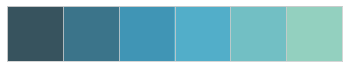

<Figure size 144x936 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.palplot(sns.color_palette("GnBu_d"))
sns.set_palette("GnBu_d")
plt.figure(figsize=(2, 13))

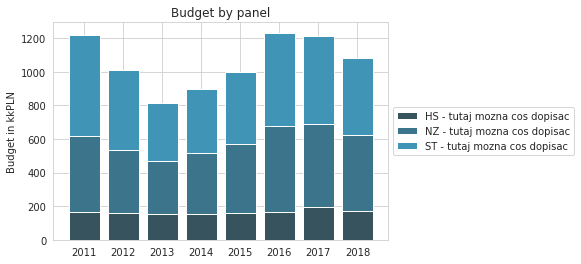

In [27]:
bottom = plot1_data.loc[plot1_data.subpanel_code_type == 'ST', 'budget_pln'] * 0
bottom = np.array(bottom)

for panel in list(plot1_data.subpanel_code_type.unique()):
    
    df = plot1_data.loc[plot1_data.subpanel_code_type == panel, :]
    plt.bar(df.year, df.budget_pln , bottom = bottom, label=panel + " - tutaj mozna cos dopisac")
    bottom += np.array(df.budget_pln)

    plt.ylabel('Budget in kkPLN')
    
plt.title('Budget by panel')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

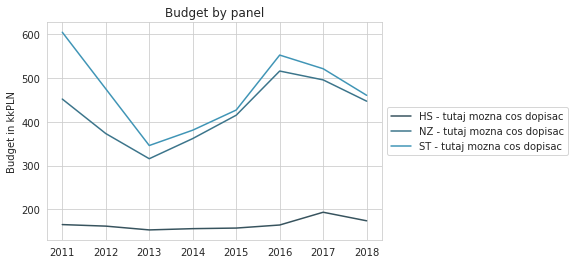

In [30]:
for panel in list(plot1_data.subpanel_code_type.unique()):
    
    df = plot1_data.loc[plot1_data.subpanel_code_type == panel, :]
    plt.plot(df.year, df.budget_pln, label=panel + " - tutaj mozna cos dopisac")
    
    plt.ylabel('Budget in kkPLN')
    
plt.title('Budget by panel')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [34]:
plot1_data.groupby('subpanel_code_type').sum()

,budget_pln
subpanel_code_type,
HS,1326.251149
NZ,3376.958201
ST,3768.027727


In [35]:
sum(plot1_data.budget_pln)

8471.237076999998

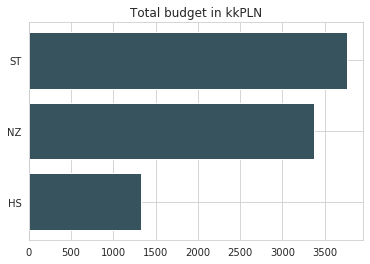

In [112]:
plot2_data = grants.groupby('subpanel_code_type').sum().loc[:, ['budget_pln']].reset_index()

plot2_data = plot2_data.sort_values('budget_pln', ascending=True).reset_index(drop=True)

plot2_data.budget_pln /= 10 ** 6

plt.barh(plot2_data.subpanel_code_type, plot2_data.budget_pln)
plt.title('Total budget in kkPLN')

plt.show()

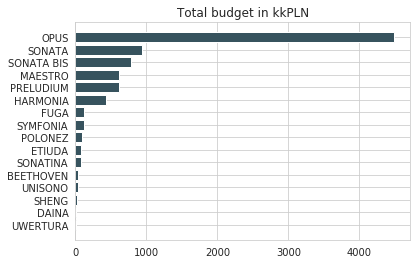

In [115]:
plot3_data = grants.groupby('comp_name').sum().loc[:, ['budget_pln']].reset_index()

plot3_data = plot3_data.sort_values('budget_pln', ascending=True).reset_index(drop=True)

plot3_data.budget_pln /= 10 ** 6

plt.barh(plot3_data.comp_name, plot3_data.budget_pln)
plt.title('Total budget in kkPLN')

plt.show()